# Dimensional Reduction

## Run following dimensional reduction algorithms for given fonts
1. Principal Component Analysis (PCA)
1. IsoMap
1. t-SNE

## Imports And Globals

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

import font_utils.load_font as LF
import font_utils.upper_lower_numerals as ULN
import plot_utils.plot_font as PU
import sci_kit_learn_utils as SKU

## Read Font
1. Returns dictionary for each variant with following fields
    1. df - pandas data frame with following trimming
        1. Retains m_label, and r0c0,...,r19c19 columns only
        1. No italic
        1. Only a-zA-Z0-9 returned
        1. Only min instances of each character based on min for a-zA-Z0-9
    1. min_char_count - number of instances of each character

In [3]:
lf = LF.LoadFont('garamond')
font_dict = lf.get_trimmed_font()
for k,v in font_dict.items():
    c=v['min_char_count']
    print(f'{k:25s} : {c}')

GARAMOND                  : 2


### Show Example Character

1. iloc=0 is the normal weight example
1. iloc=1 is the bold weight example

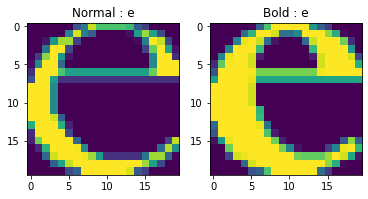

In [4]:
font_df = font_dict['GARAMOND']['df']
example_ltr = ord('e')

norm_ltr = font_df.loc[font_df.m_label == example_ltr].iloc[0]
bold_ltr = font_df.loc[font_df.m_label == example_ltr].iloc[1]

ltrs = [norm_ltr, bold_ltr]
caption_str = ['Normal', 'Bold']

ex_rows=1
ex_cols=2
ex_fig_size = [6,8]

# create figure (fig), and array of axes (ax)
ex_fig, ex_ax = plt.subplots(nrows=ex_rows, ncols=ex_cols, figsize=ex_fig_size)
for i, axi in enumerate(ex_ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    img = np.array(ltrs[i][1:], dtype=np.uint8).reshape(20,20)
    axi.imshow(img)
    # get indices of row/column
    # write row/col indices as axes' title for identification
    axi.set_title(f'{caption_str[i]} : {chr(ltrs[i][0])}')

plt.show()

### Create DataFrames

1. Raw DataFrame has multiple sets of characters
1. Garamond has 2 - normal/bold weight
1. Separate into DataFrames

In [5]:
uln = ULN.UpperLowerNumerals.get_ascii_codes()
norm_df = pd.DataFrame(data=[font_df.loc[font_df.m_label == x].iloc[0] for x in uln])
bold_df = pd.DataFrame(data=[font_df.loc[font_df.m_label == x].iloc[1] for x in uln])

## Perform PCA
1. Create PCA object based on given font
1. Create dataframe with x,y,char_label for each character
1. Create color map which labels similar characters together using knoweldge of fonts
1. Create scatter plot with given font and labels

### Normal Weight PCA

Len of eigenvector 400
Explained Variance Ratio  : 0.1524
Sum of explained variance : 0.8304975162873068
Len label_ar 62
Len x 62
Len y 62


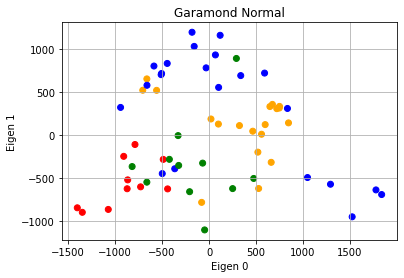

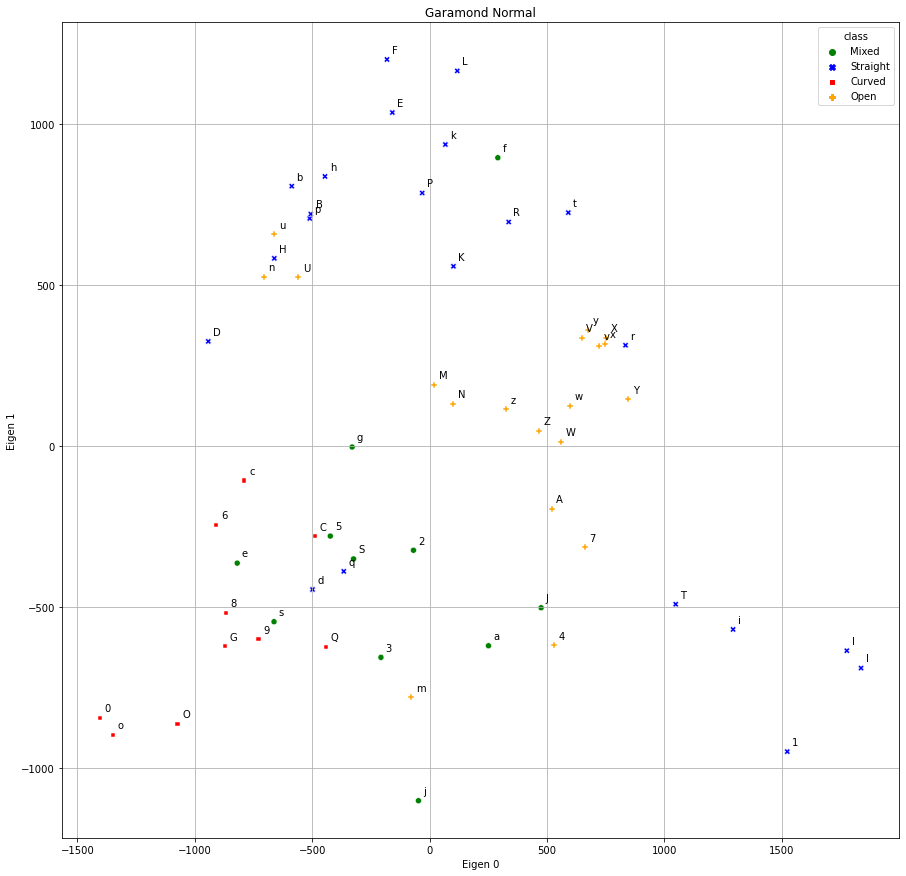

In [6]:
PU.PlotUtils.plot_pca(norm_df,'Garamond Normal')

### Bold Weight PCA

Len of eigenvector 400
Explained Variance Ratio  : 0.2047
Sum of explained variance : 0.8624789857192642
Len label_ar 62
Len x 62
Len y 62


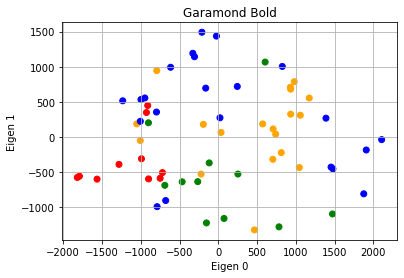

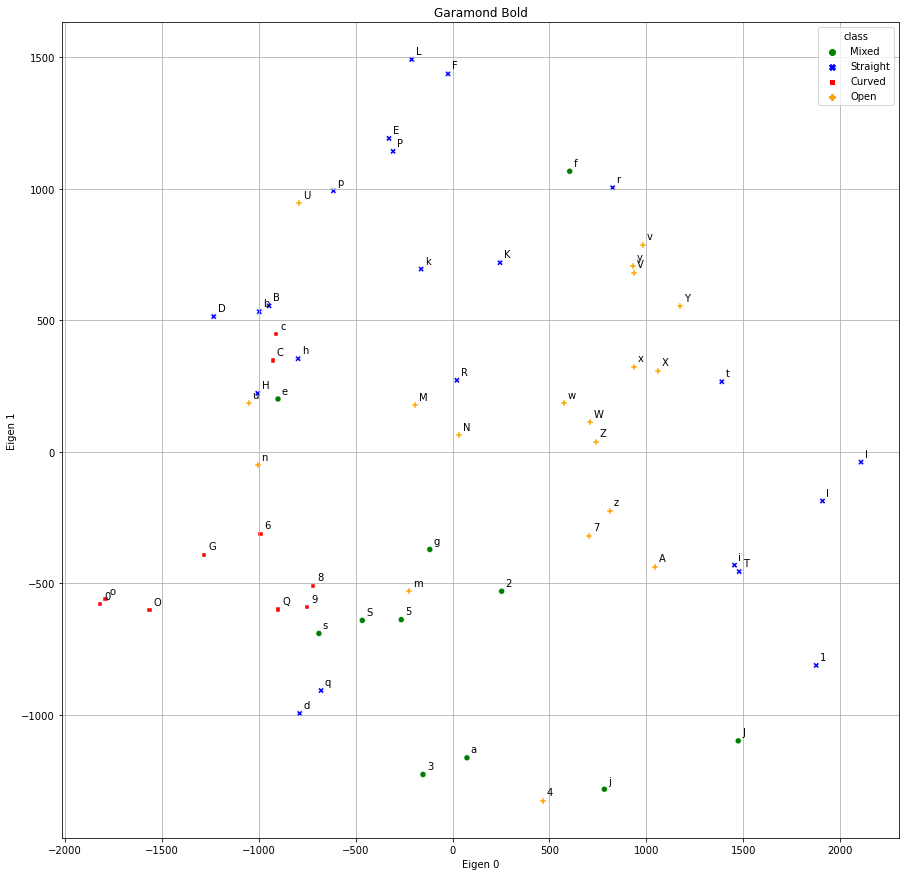

In [8]:
PU.PlotUtils.plot_pca(bold_df,'Garamond Bold')

#### To Print character/color/coordinates

## Perform IsoMap
1. Create Isomap object on given font
1. Create dataframe with x,y,char_label for each character
1. Create color map which labels similar characters together using knoweldge of fonts
1. Create scatter plot with given font and labels

### Normal Weight IsoMap

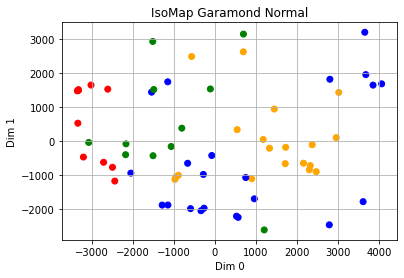

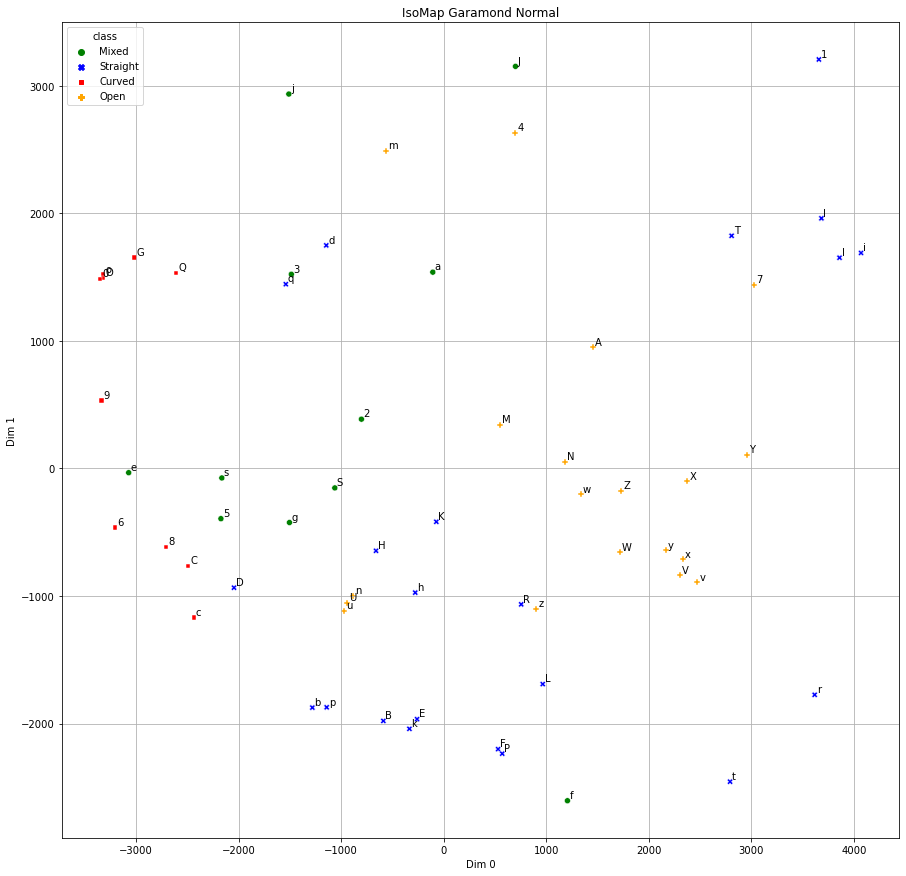

In [7]:
PU.PlotUtils.plot_isomap(norm_df,'IsoMap Garamond Normal')

### Bold Weight IsoMap

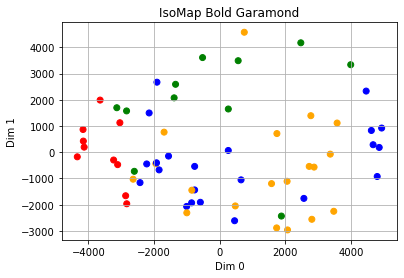

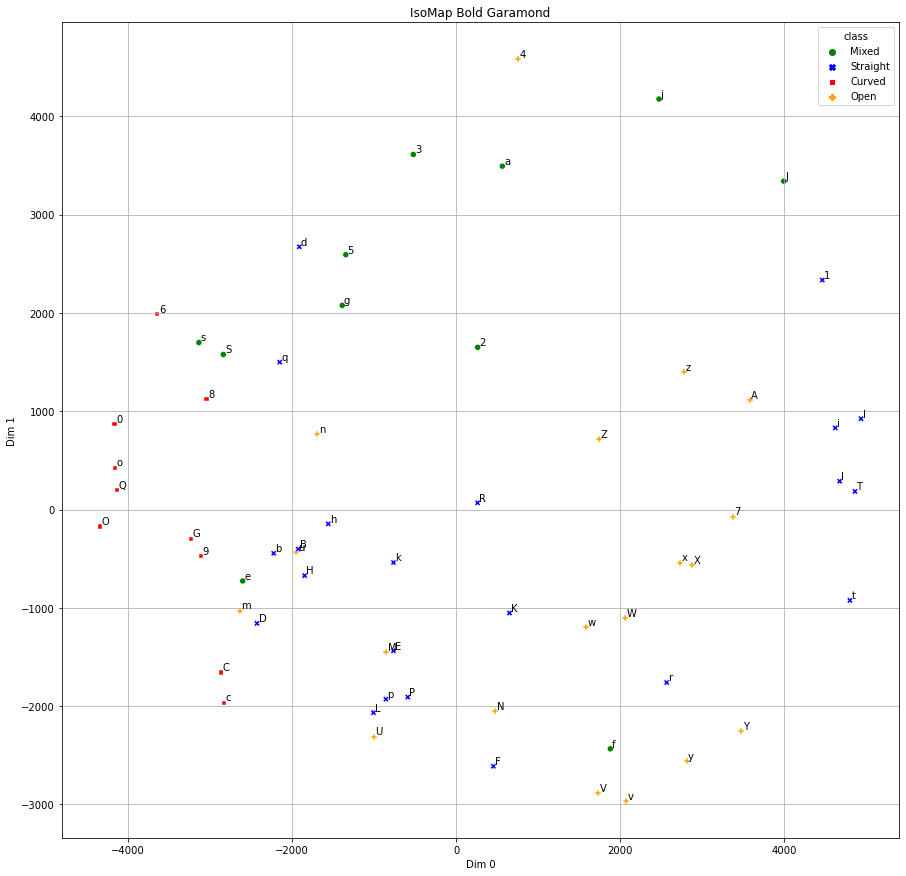

In [9]:
PU.PlotUtils.plot_isomap(bold_df, 'IsoMap Bold Garamond')

## Perform t-SNE
1. Create TSNE object on given font
1. Create dataframe with x,y,char_label for each character
1. Create color map which labels similar characters together using knoweldge of fonts
1. Create scatter plot with given font and labels

### Normal Weight TSNE

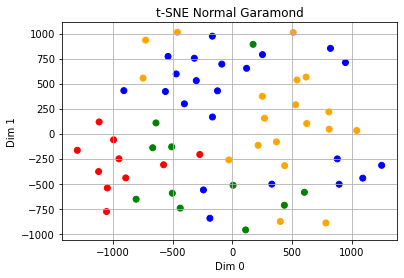

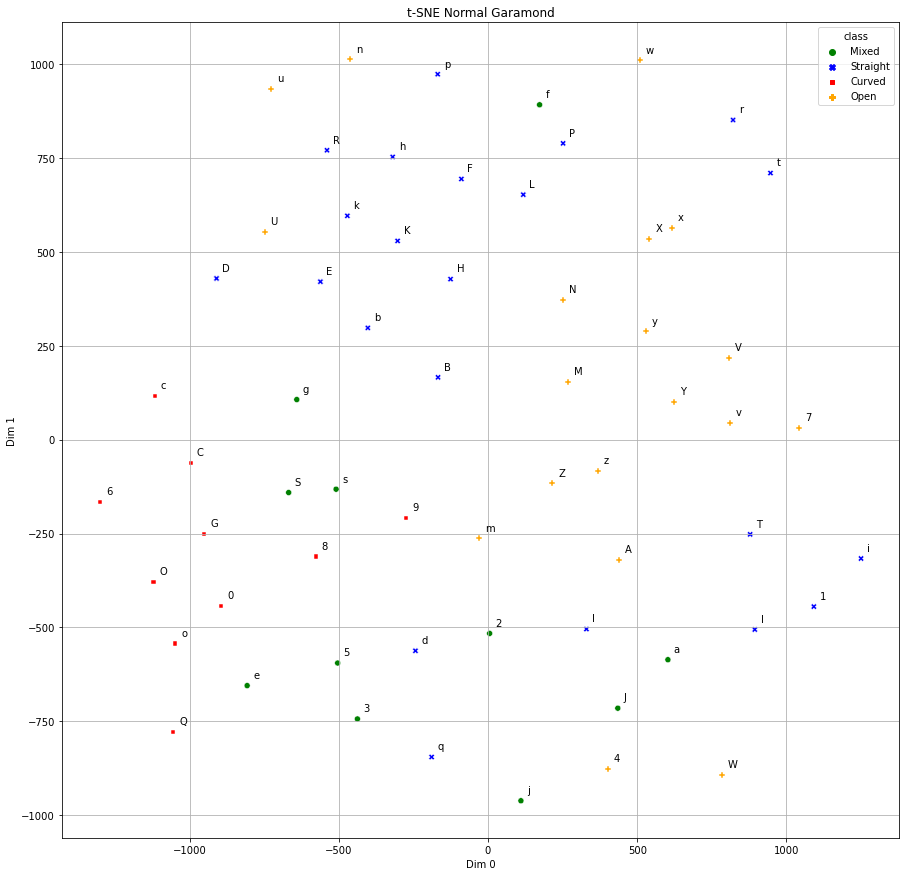

In [10]:
PU.PlotUtils.plot_tsne(norm_df,'t-SNE Normal Garamond')

### Bold Weight TSNE

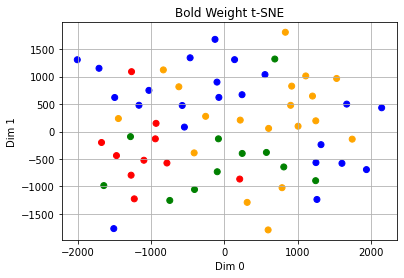

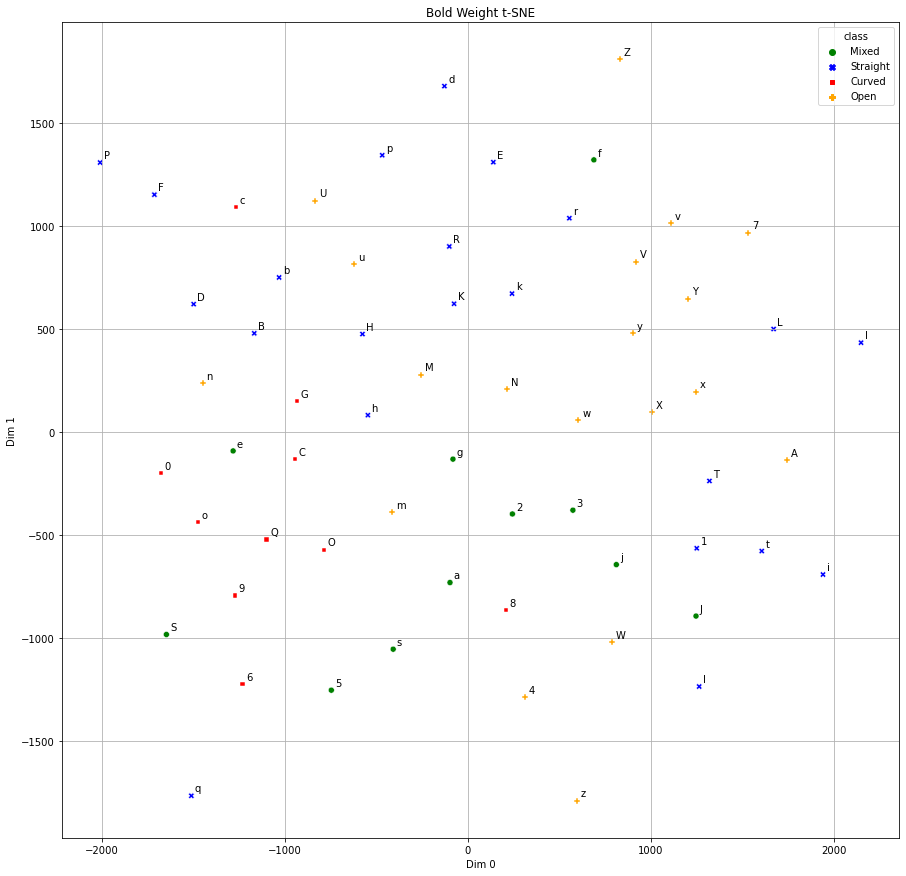

In [11]:
PU.PlotUtils.plot_tsne(bold_df,'Bold Weight t-SNE')